# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
# This dataset has a total of 5391 rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [6]:
# We have a total of 6 columns
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [7]:
#Checking the shape of the dataset
data.shape

(5391, 6)

In [8]:
# There are no mising values
data.isna().value_counts()

Rank   Release_Date  Movie_Title  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
False  False         False        False                  False                False                 5391
Name: count, dtype: int64

In [9]:
# There are no duplicates in the data
data.duplicated().any()

False

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

#### USD_Production_Budget

In [10]:
data["USD_Production_Budget"].head()

0    $110,000
1    $385,907
2    $200,000
3    $100,000
4    $245,000
Name: USD_Production_Budget, dtype: object

In [11]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace(",", "")

In [12]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace("$", "")

In [13]:
data["USD_Production_Budget"].head()

0    110000
1    385907
2    200000
3    100000
4    245000
Name: USD_Production_Budget, dtype: object

In [14]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(int)

#### USD_Worldwide_Gross

In [15]:
data["USD_Worldwide_Gross"].head()

0    $11,000,000
1             $0
2     $8,000,000
3     $3,000,000
4    $22,000,000
Name: USD_Worldwide_Gross, dtype: object

In [16]:
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace(",", "")

In [17]:
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace("$", "")

In [18]:
data["USD_Worldwide_Gross"].head()

0    11000000
1           0
2     8000000
3     3000000
4    22000000
Name: USD_Worldwide_Gross, dtype: object

In [19]:
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(int)

#### USD_Domestic_Gross

In [20]:
data["USD_Domestic_Gross"].head()

0    $10,000,000
1             $0
2     $8,000,000
3     $3,000,000
4    $11,000,000
Name: USD_Domestic_Gross, dtype: object

In [21]:
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace(",", "")

In [22]:
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace("$", "")

In [23]:
data["USD_Domestic_Gross"].head()

0    10000000
1           0
2     8000000
3     3000000
4    11000000
Name: USD_Domestic_Gross, dtype: object

In [24]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [25]:
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(int)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [27]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

In [28]:
data["Release_Date"].head()

0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

In [29]:
data["Release_Date"].dtype

dtype('<M8[ns]')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [31]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


1. What is the average production budget of the films in the data set?

    The average production budget in the dataset is: $31,113,737.58.


2. What is the average worldwide gross revenue of films?

    The average worldwide gross revenue of films is: $88,855,421.96.


3. What were the minimums for worldwide and domestic revenue?

    The minumum worldwide and the minimum domestic gross are both: $0.00.


4. Are the bottom 25% of films actually profitable or do they lose money?
The minimum 25% of the films looks like this:
* 5,000,000.00 USD_Production_Budget
* 3,865,206.00 USD_Worldwide_Gross
* 1,330,901.50 USD_Domestic_Gross

    Comparing the numbers of the different variables for the bottom 25%, they don't look very profitable. 
While the production budget is $5,000,000.00, the worldwide revenue is just 3,865,206.00 and the domestic revenues is even lower: $1,330,901.50.

5. What are the highest production budget and highest worldwide gross revenue of any film?

In [32]:
print("The 10 highest production budgests are for:")
data.sort_values("USD_Production_Budget", ascending= False).head(10)

The 10 highest production budgests are for:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
4223,7,2012-09-03,John Carter,275000000,282778100,73058679
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099
3777,8,2010-11-24,Tangled,260000000,586581936,200821936
2885,9,2007-04-05,Spider-Man 3,258000000,890875303,336530303
4511,15,2013-12-13,The Hobbit: The Desolation of Smaug,250000000,960366855,258366855


In [33]:
print("The 10 highest worldwide gross revenue are for:")
data.sort_values("USD_Worldwide_Gross", ascending= False).head(10)

The 10 highest worldwide gross revenue are for:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547
4844,59,2015-03-04,Furious 7,190000000,1516748684,351032910
4789,10,2015-01-05,Avengers: Age of Ultron,250000000,1404705868,459005868
3925,231,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,1341511219,381011219
4497,134,2013-11-22,Frozen,150000000,1274234980,400738009
5330,115,2017-03-17,Beauty and the Beast,160000000,1260122363,504014165


We can see that just two of them are in both categories Avatar, Star Wars Ep. VII: The Force Awakens.



6. How much revenue did the lowest and highest budget films make?

In [34]:
print("The lowest worldwide budgeted film is:")
data.sort_values("USD_Production_Budget", ascending= True).head(1)

The lowest worldwide budgeted film is:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [35]:
print("The highest worldwide budgeted film is")
data.sort_values("USD_Production_Budget", ascending= False).head(1)

The highest worldwide budgeted film is


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [36]:
domestical_gross_0 = data[data["USD_Domestic_Gross"] == 0]
domestical_gross_0.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0


In [37]:
print(f"There are a total of {domestical_gross_0.shape[0]} films in the United States with $0 revenue.")

There are a total of 512 films in the United States with $0 revenue.


In [38]:
sorted_domestical_gross_0 = domestical_gross_0.sort_values("USD_Production_Budget", ascending = False)
sorted_domestical_gross_0.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


In [39]:
print(f"The highest budget films that grossed nothing is ${sorted_domestical_gross_0.loc[5388,'USD_Production_Budget']}, for the movie: {sorted_domestical_gross_0.loc[5388,'Movie_Title']}.")

The highest budget films that grossed nothing is $175000000, for the movie: Singularity.


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [40]:
worldwide_gross_0 = data[data["USD_Worldwide_Gross"] == 0]
worldwide_gross_0.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0


In [41]:
print(f"There are a total of {worldwide_gross_0.shape[0]} films in the United States with $0 revenue.")

There are a total of 357 films in the United States with $0 revenue.


In [42]:
sorted_worldwide_gross_0 = worldwide_gross_0.sort_values("USD_Production_Budget", ascending = False)
sorted_worldwide_gross_0.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [43]:
print(f"The highest budget films that grossed nothing is {sorted_worldwide_gross_0.loc[5388,'USD_Production_Budget']}, for the movie: {sorted_worldwide_gross_0.loc[5388,'Movie_Title']}.")

The highest budget films that grossed nothing is 175000000, for the movie: Singularity.


### Filtering on Multiple Conditions

In [44]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}.")
international_releases.head()

Number of international releases: 155.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [45]:
internationa_releases_query = data.query(('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0'))
print(f"Number of international releases: {len(internationa_releases_query)}.")
internationa_releases_query.head()

Number of international releases: 155.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [46]:
no_release_film = data.loc[data["Release_Date"] > '2018-05-01']
print(f"The number of movies that didn't had the opportunity to be released is {len(no_release_film)}.") 
no_release_film 

The number of movies that didn't had the opportunity to be released is 7.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [47]:
data_clean = data.loc[data["Release_Date"] < '2018-05-01']

Teacher's soluition

In [48]:
# Date of Data Collection
# scrape_date = pd.Timestamp('2018-5-1')
# future_release = data[data.Release_Data >= scrape_date]
# print(f"Number of unreleased movies: {len(future_releases)}.")
# future_releases
# data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [49]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [50]:
films_that_lost_money = data_clean.loc[(data_clean["USD_Production_Budget"]) > (data_clean["USD_Worldwide_Gross"])]
films_that_lost_money.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0


In [51]:
percentage = len(films_that_lost_money) / len(data_clean)
print(f"The percentage of films that lost money is {(percentage)*100}%.")

The percentage of films that lost money is 37.27711738484398%.


# Seaborn for Data Viz: Bubble Charts

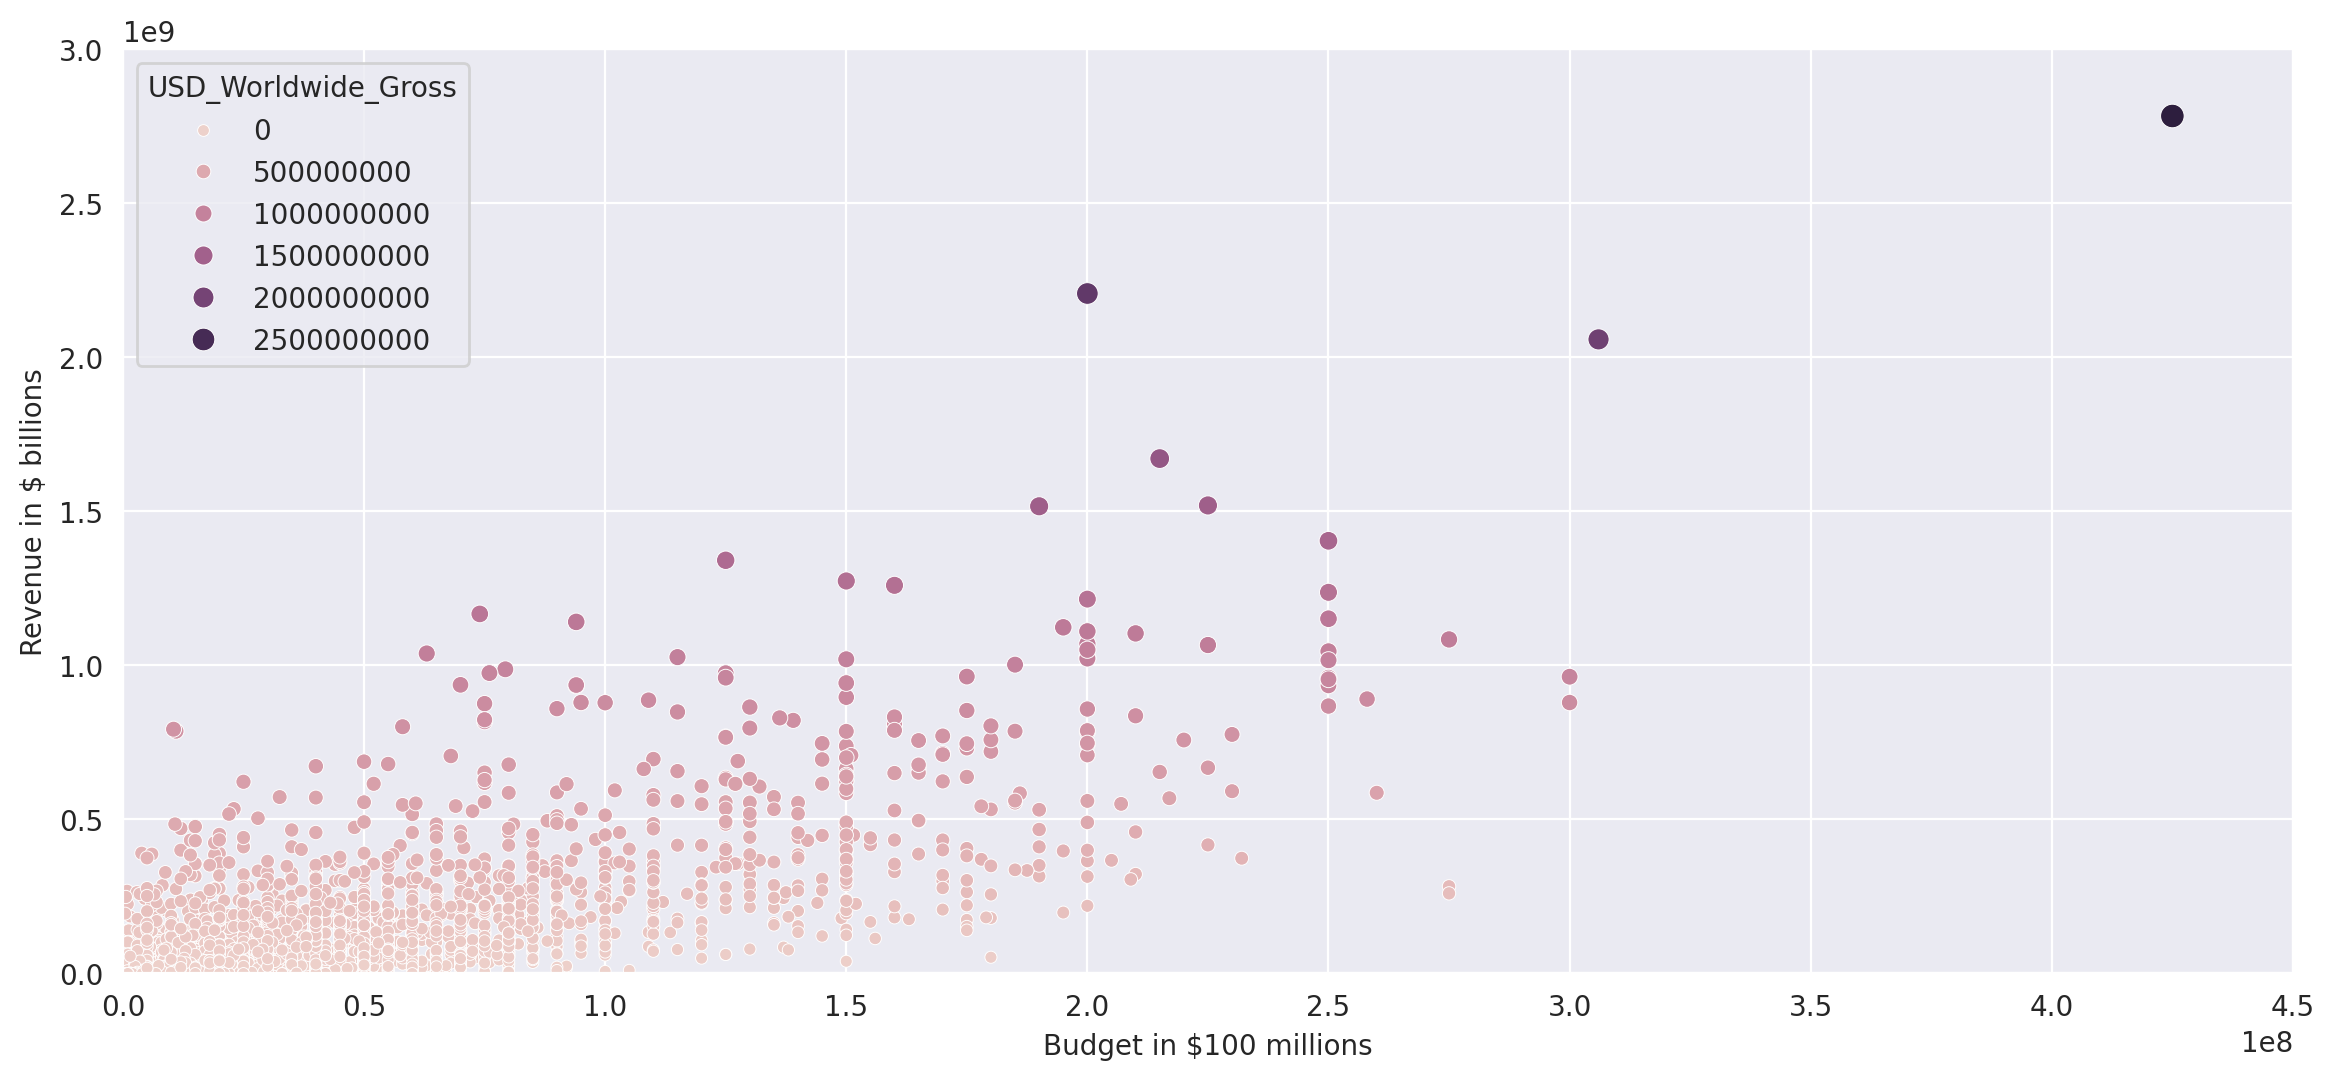

In [52]:
plt.figure(figsize = (14, 6), dpi = 200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data = data_clean,
        x = "USD_Production_Budget",
        y = "USD_Worldwide_Gross",
        hue = "USD_Worldwide_Gross",
        size = "USD_Worldwide_Gross",
    )

    ax.set(
        ylim = (0, 3000000000),
        xlim = (0, 450000000),
        ylabel = "Revenue in $ billions",
        xlabel = "Budget in $100 millions",
    )

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



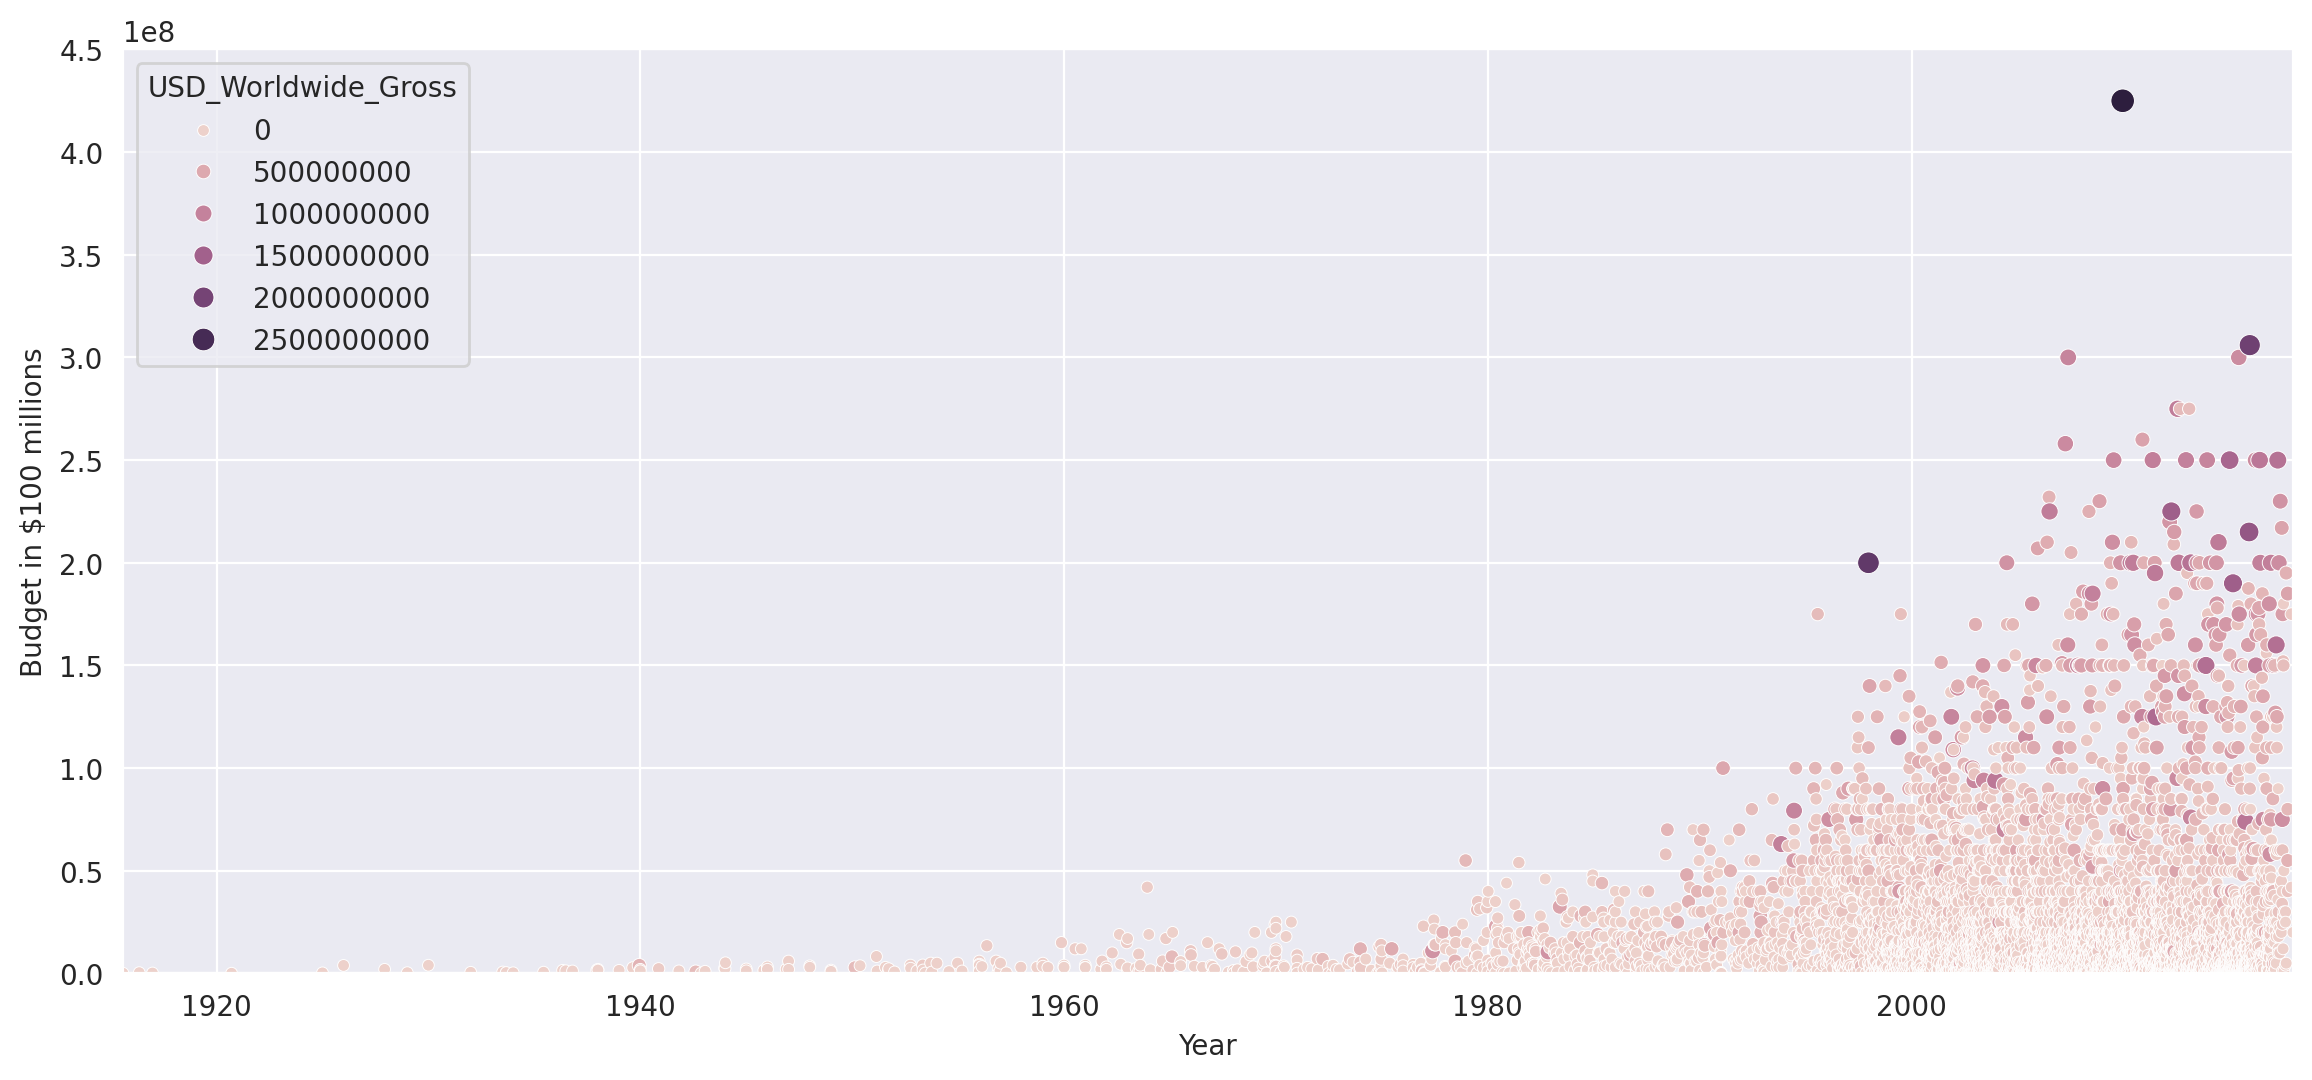

In [53]:
plt.figure(figsize = (14, 6), dpi = 200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data = data_clean,
        x = "Release_Date",
        y = "USD_Production_Budget",
        hue = "USD_Worldwide_Gross",
        size = "USD_Worldwide_Gross",
    )

    ax.set(
        ylim = (0, 450000000),
        xlim = (data_clean.Release_Date.min() , data_clean.Release_Date.max()),
        ylabel = "Budget in $100 millions",
        xlabel = "Year",
    )

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [54]:
idx = pd.DatetimeIndex(data_clean["Release_Date"])
years = idx.year

In [55]:
decades = years // 10 *10 # Floor division
data_clean["Decade"] = decades

/var/folders/42/vt_wzvbx0tn249g7gfkfhb5r0000gn/T/ipykernel_8732/2805651631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Decade"] = decades


In [56]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [57]:
old_films = data_clean.loc[data_clean["Decade"] <= 1960]
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [58]:
print(f"Films released prior to 1970: {len(old_films)}.")

Films released prior to 1970: 153.


In [59]:
most_expendive_before_1970_budget = old_films['USD_Production_Budget'].max()
most_expendive_before_1970_idx = old_films['USD_Production_Budget'].idxmax()
most_expensive_before_1970 = old_films.loc[109:109]
print(f"The most expensive filb before 1970 was {old_films['Movie_Title'][109]} with a budget of {most_expendive_before_1970_budget}.")
most_expensive_before_1970

The most expensive filb before 1970 was Cleopatra with a budget of 42000000.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [60]:
new_films = data_clean.loc[data_clean["Decade"] >= 1960]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
85,4171,1960-01-01,Exodus,4000000,21750000,21750000,1960
86,4347,1960-01-01,The Apartment,3000000,24600000,18600000,1960
87,4357,1960-01-01,Elmer Gantry,3000000,10400000,10400000,1960
88,3151,1960-07-10,Spartacus,12000000,60000000,30000000,1960
89,3185,1960-10-24,The Alamo,12000000,7900000,7900000,1960


# Seaborn Regression Plots

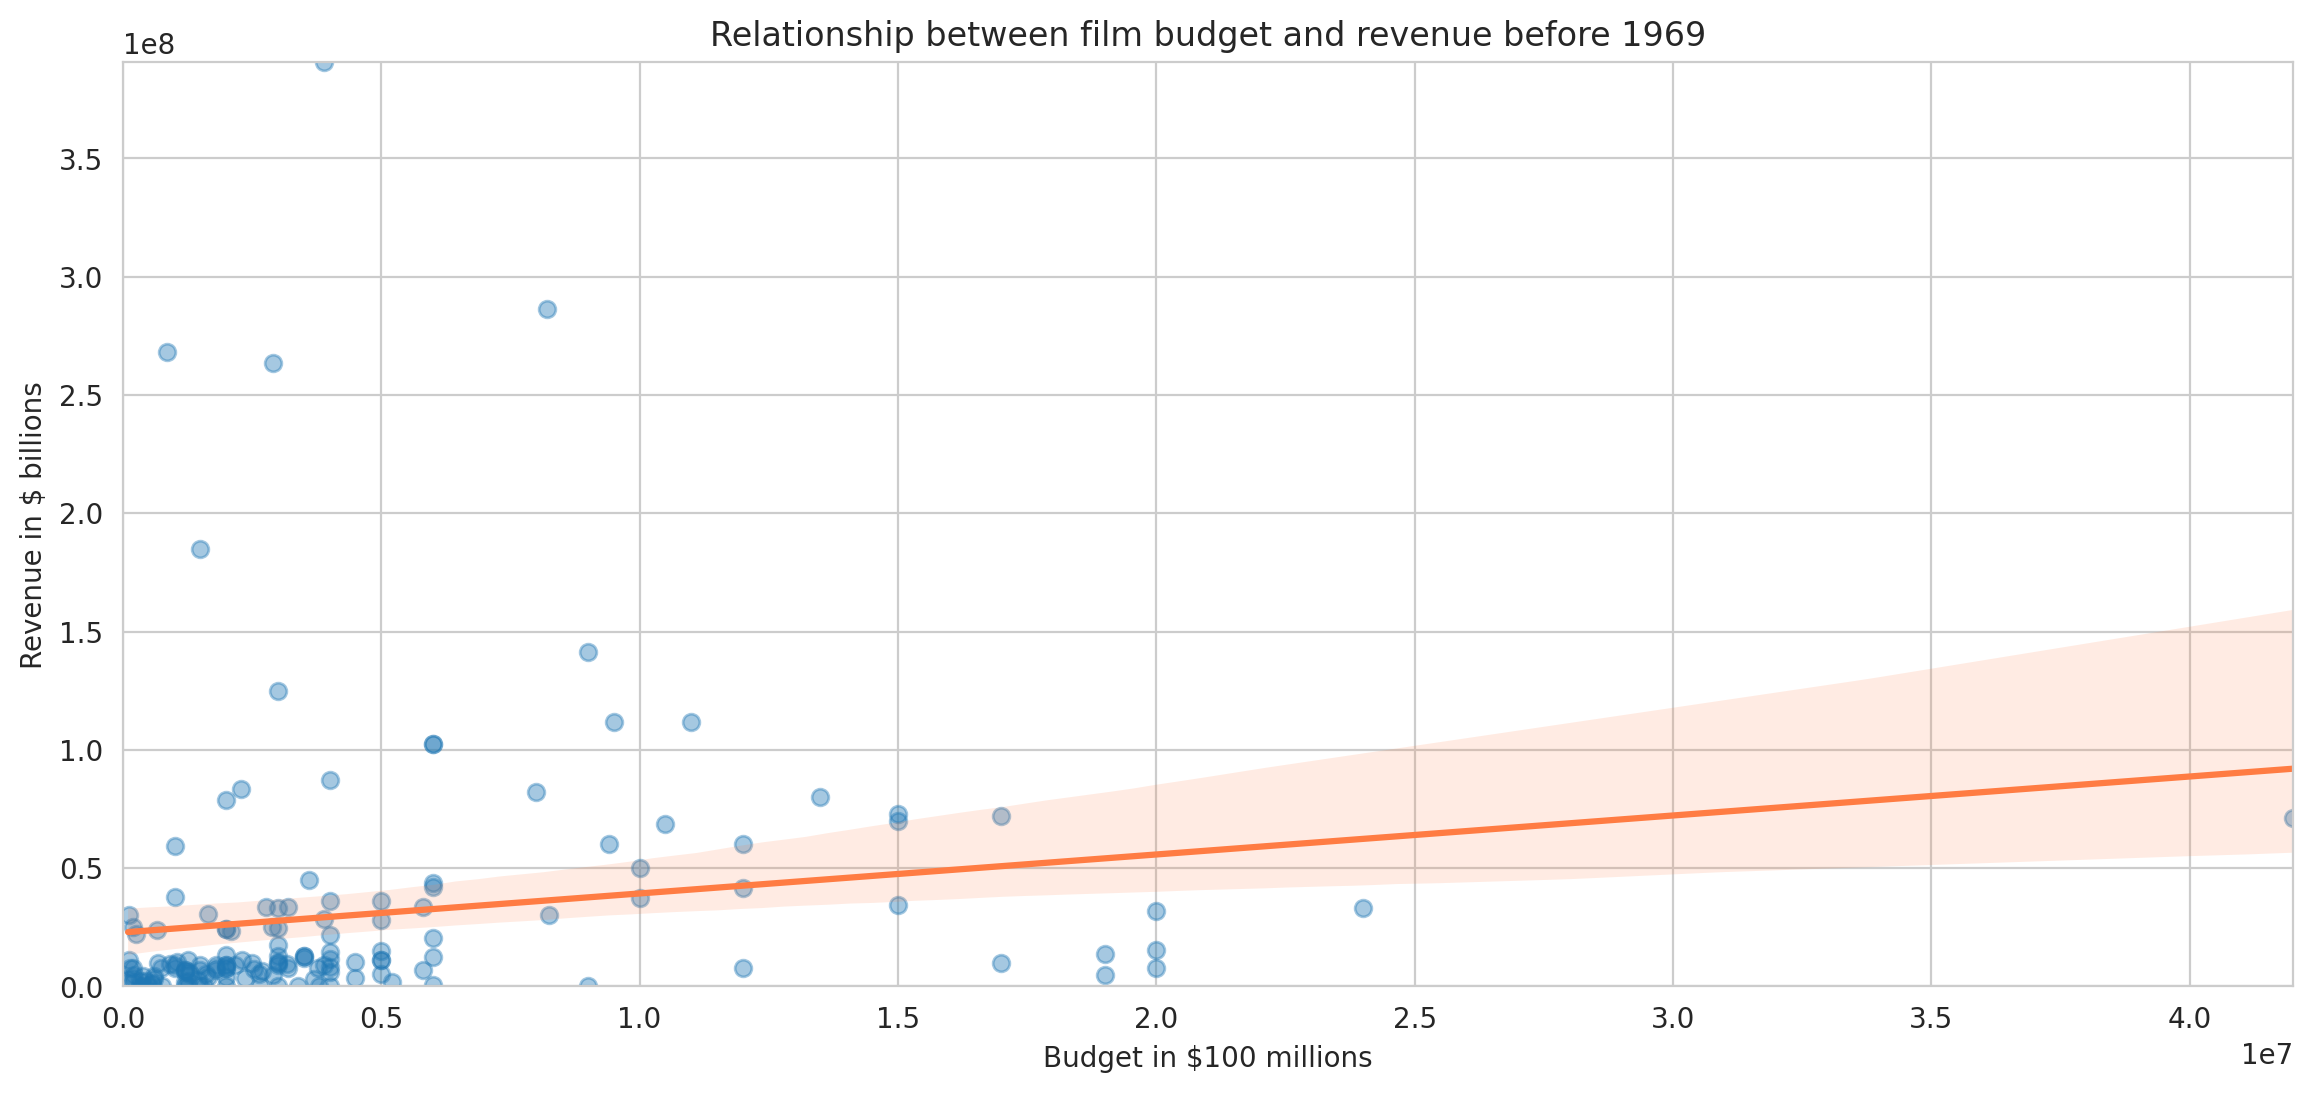

In [62]:
#This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time. 
plt.figure(figsize = (14, 6), dpi = 200)

with sns.axes_style("whitegrid"):
    ax = sns.regplot(
        data = old_films,
        x = "USD_Production_Budget",
        y = "USD_Worldwide_Gross",
        scatter_kws = {'alpha': 0.4},
        line_kws = {'color': '#ff7c43'},
    )
    ax.set(
        xlim = (0, old_films.USD_Production_Budget.max()),
        ylim = (0, old_films.USD_Worldwide_Gross.max()),
        ylabel = "Revenue in $ billions",
        xlabel = "Budget in $100 millions",
        title = "Relationship between film budget and revenue before 1969"
    )
plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

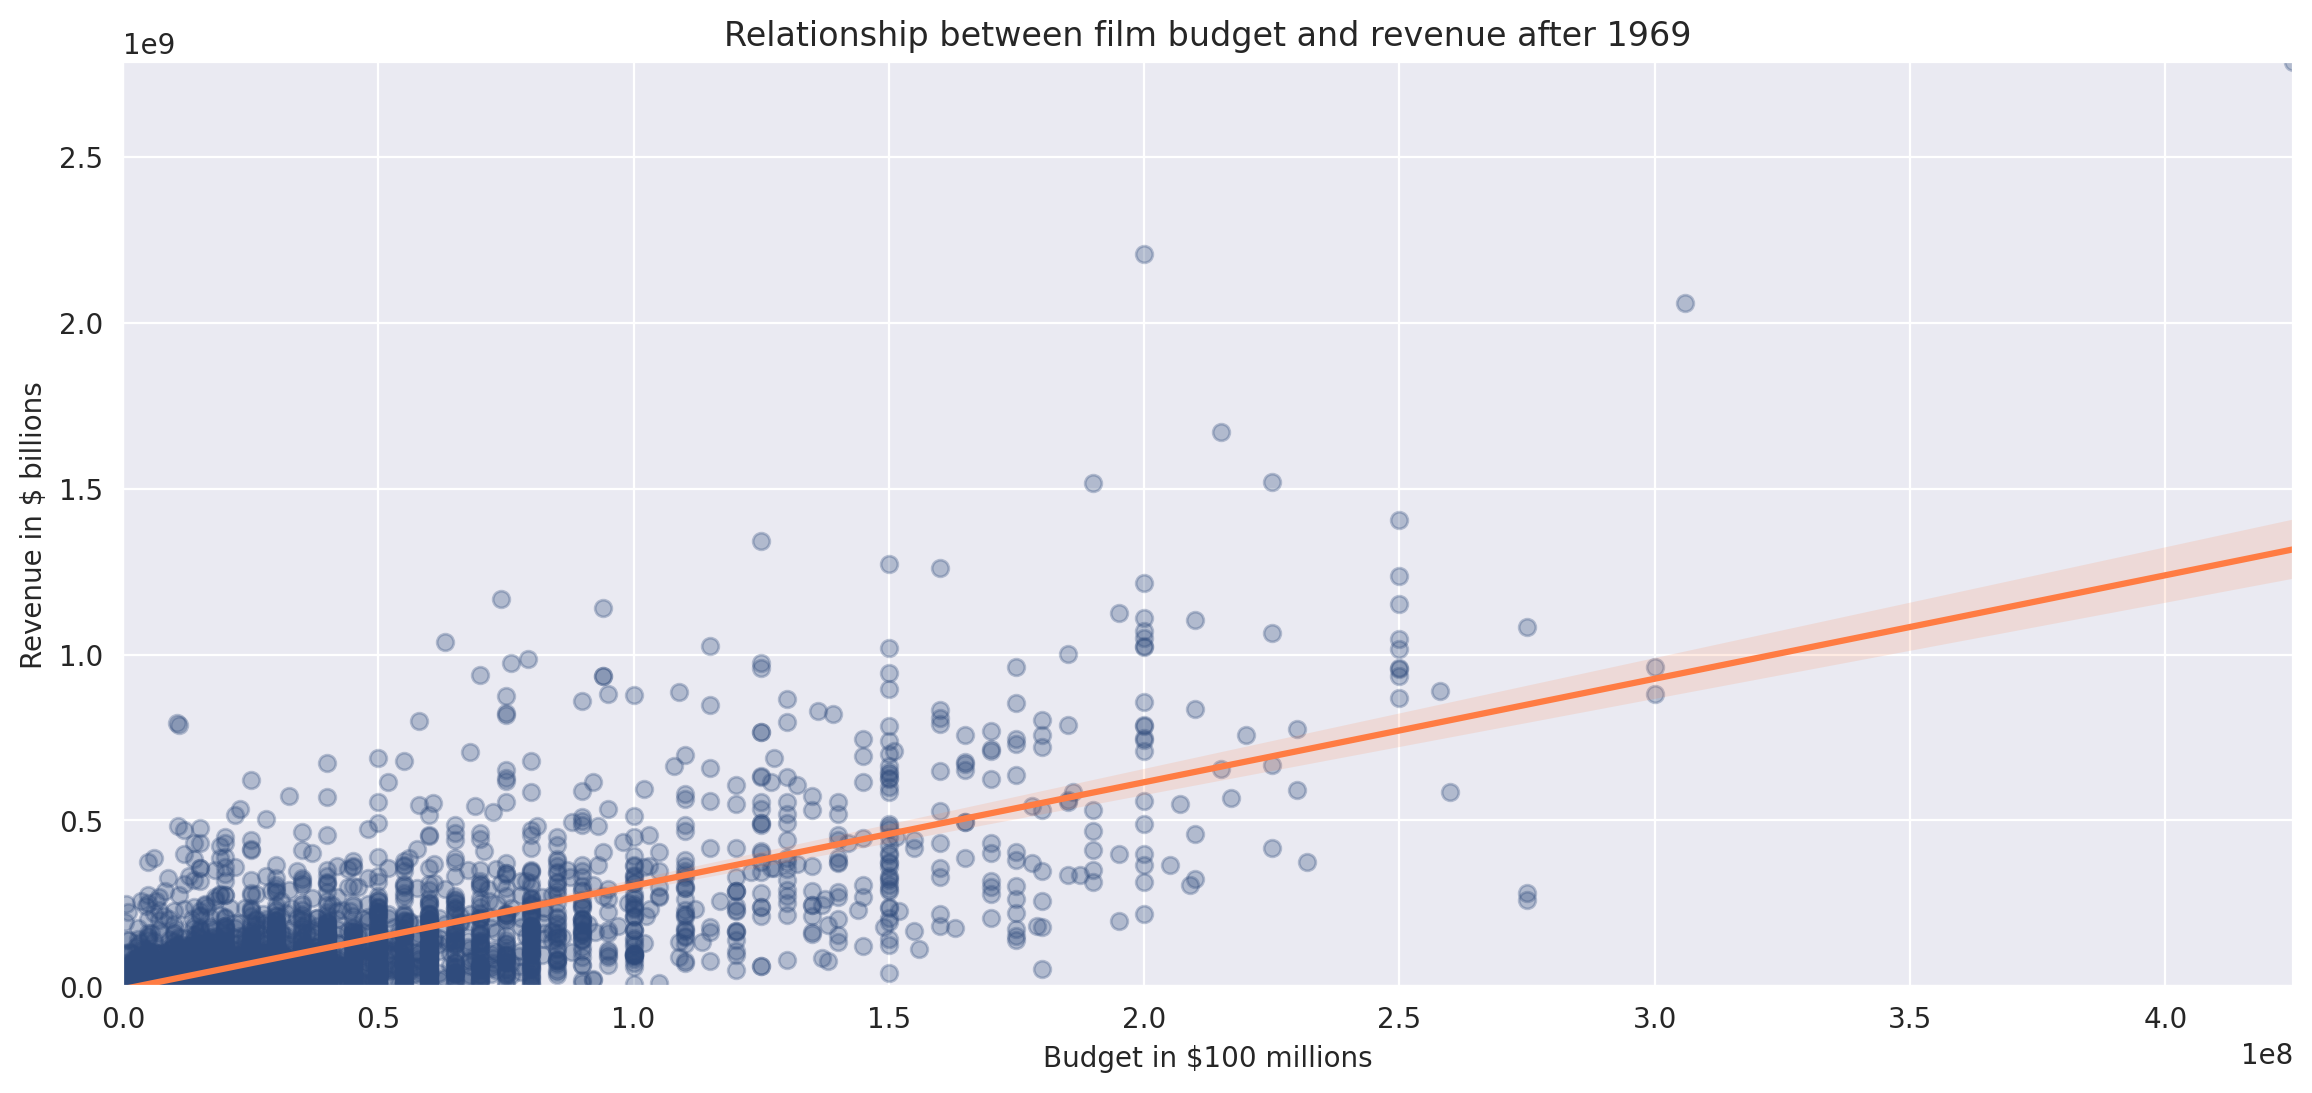

In [537]:
#This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time. 
plt.figure(figsize = (14, 6), dpi = 200)

with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data = new_films,
        x = "USD_Production_Budget",
        y = "USD_Worldwide_Gross",
        scatter_kws = {
            'color': '#2f4b7c', 
            "alpha":0.3},
        line_kws = {'color': '#ff7c43'},
    )
    
    ax.set(
        xlim = (0, new_films.USD_Production_Budget.max()),
        ylim = (0, new_films.USD_Worldwide_Gross.max()),
        ylabel = "Revenue in $ billions",
        xlabel = "Budget in $100 millions",
        title = "Relationship between film budget and revenue after 1969"
    )
plt.show()

Do our data points for the new films align better or worse with the linear regression than for our older films?

Better, it looks like there is a relationship between film budget and revenue

Roughly how much would a film with a budget of $150 million make according to the regression line?

Between $0 and $1 billion, based on the regresion line is predicted to make around $500 milions.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

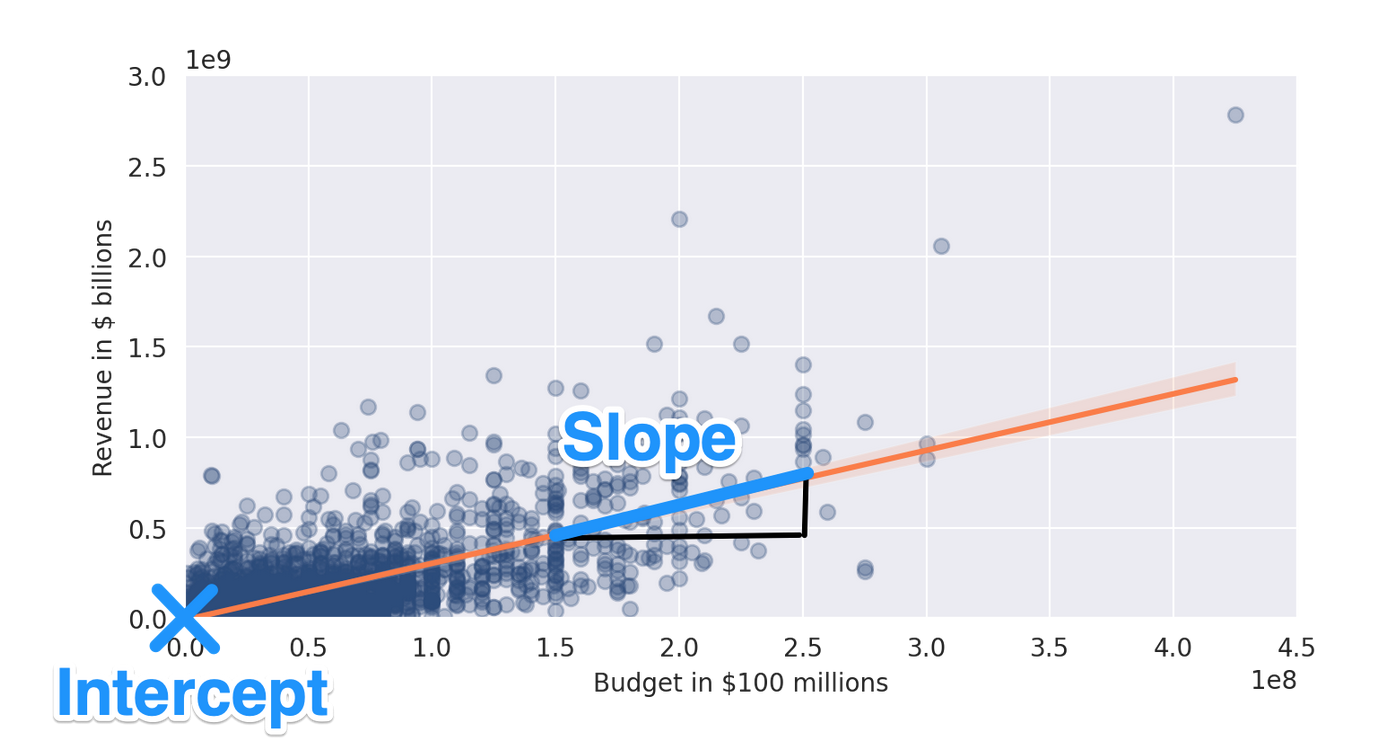

In [550]:
regression = LinearRegression()

In [551]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)

LinearRegression()

In [552]:
regression.intercept_ # Meaning: if a movie budget is $0, the estimated movie revenue is -$8.65 million

array([-8211648.30378592])

In [553]:
regression.coef_ 
# Meaning: The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. 
# That means the higher our budget, the higher our estimated revenue.

array([[3.11761857]])

In [554]:
regression.score(X, y)

0.5574978047527492

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [555]:
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X_old, y_old)

LinearRegression()

In [556]:
regression.intercept_ 

array([22821538.63508039])

In [557]:
regression.coef_

array([[1.64771314]])

In [558]:
regression.score(X_old, y_old) # The linear model explains just 2.9% of the variance in old movies.

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [559]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.') # :. how many number of digits you want to see.

The estimated revenue for a $350 film is around $600000000.0.
